# Student Performance Indicator

### Life cycle of machine learning project

1. Understanding the Problem Statement
2. Data Collection
3. Data Checks to perform
4. Exploratory data analysis
5. Data Pre-Processing
6. Model Training
7. Choose best model

1) Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental 
level of education, Lunch and Test preparation course.

2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

2.1 Import Data and Required Packages

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [5]:
df = pd.read_csv('data/stud.csv')

In [6]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df.shape

(1000, 8)

2.2 Data Information 

- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B, C, D, E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score


3) Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column


In [8]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [14]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

### EDA

In [15]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [16]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


Adding columns like total and avg score

In [17]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [25]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [26]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


We can conclude that the students have done best in reading and lest performed in maths among the three fields

### Exploring Data (Visualisation)

Histogram and kde plot

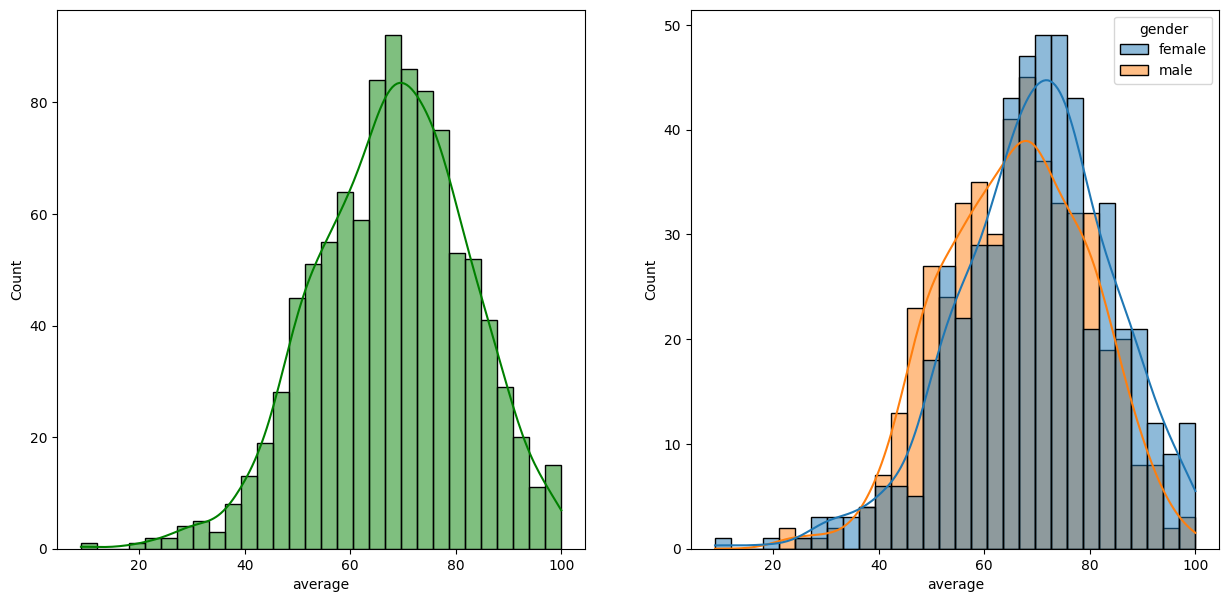

In [35]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', bins=30, kde=True, hue='gender')
plt.show()

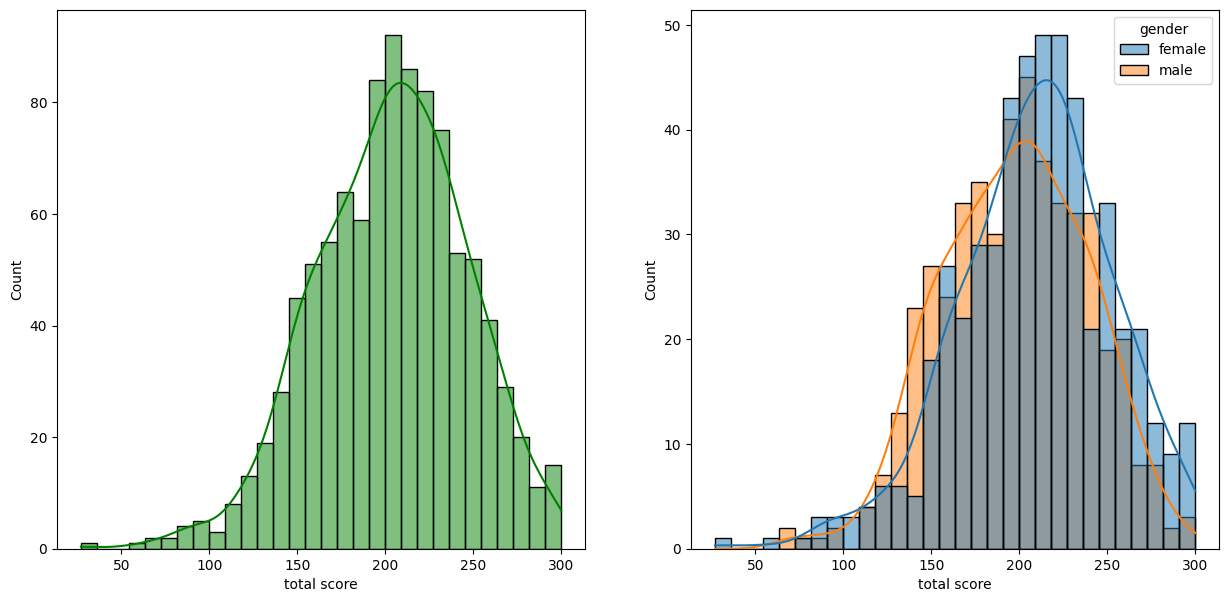

In [42]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='total score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total score', bins=30, kde=True, hue='gender')
plt.show()

Lets check the impact of lunch overall and on different gender

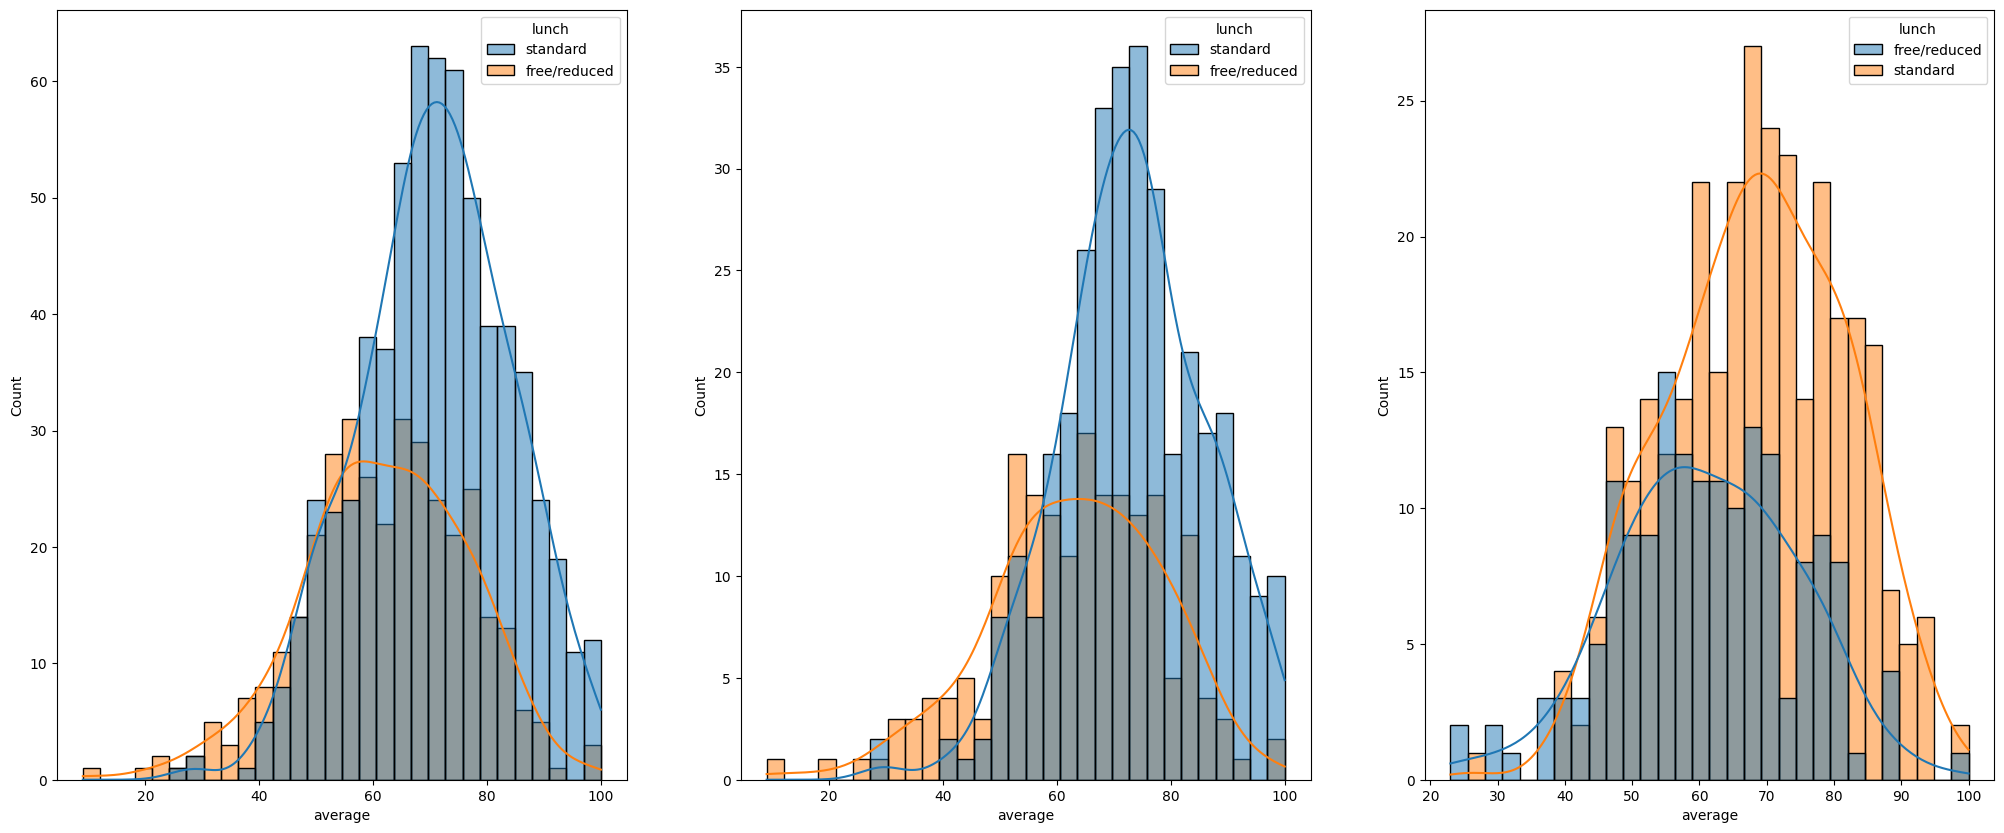

In [46]:
plt.figure(figsize=(25,10))
plt.subplot(131)
sns.histplot(data=df, x='average', bins=30, kde=True, hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='female'], x='average', bins=30, kde=True, hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='male'], x='average', bins=30, kde=True, hue='lunch')
plt.show()


We can depict that standard lunch performs overall well and also individually in both the genders

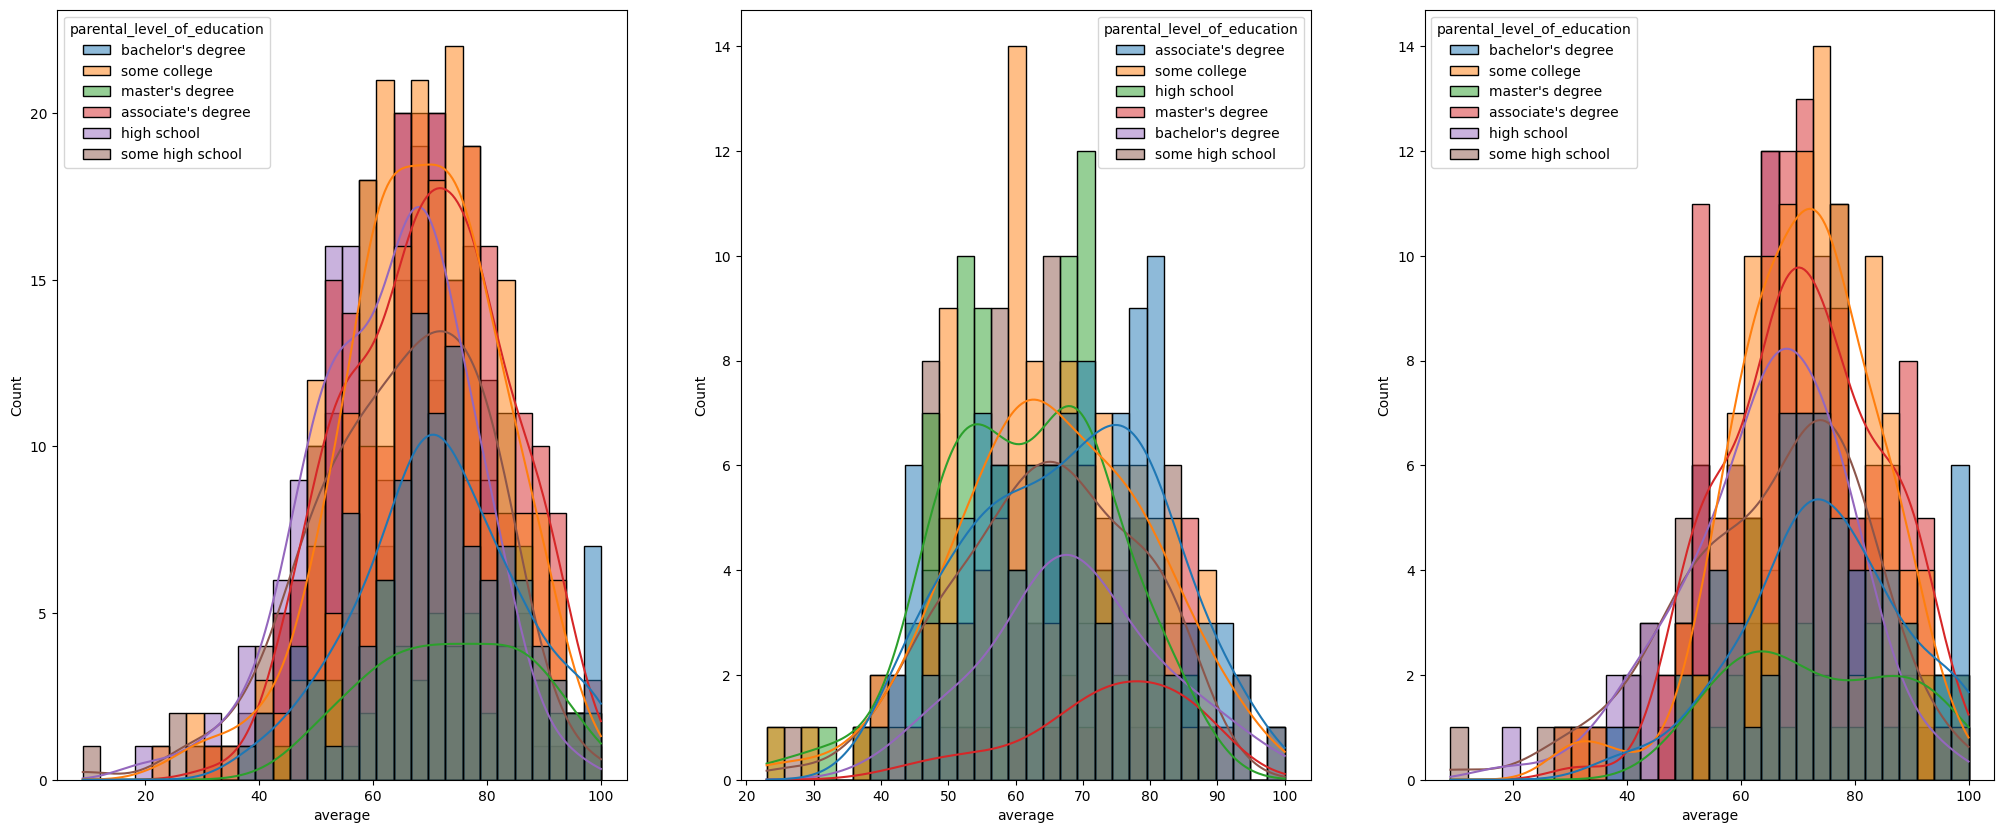

In [48]:
plt.figure(figsize=(25,10))
plt.subplot(131)
sns.histplot(data=df, x='average', bins=30, kde=True, hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='male'], x='average', bins=30, kde=True, hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='female'], x='average', bins=30, kde=True, hue='parental_level_of_education')
plt.show()

- We cna observe an irregular pattern as parent education has not a big impact on childs marks
- But one thing we can see that the most normal curve in all graph is of those whose parents are from some college

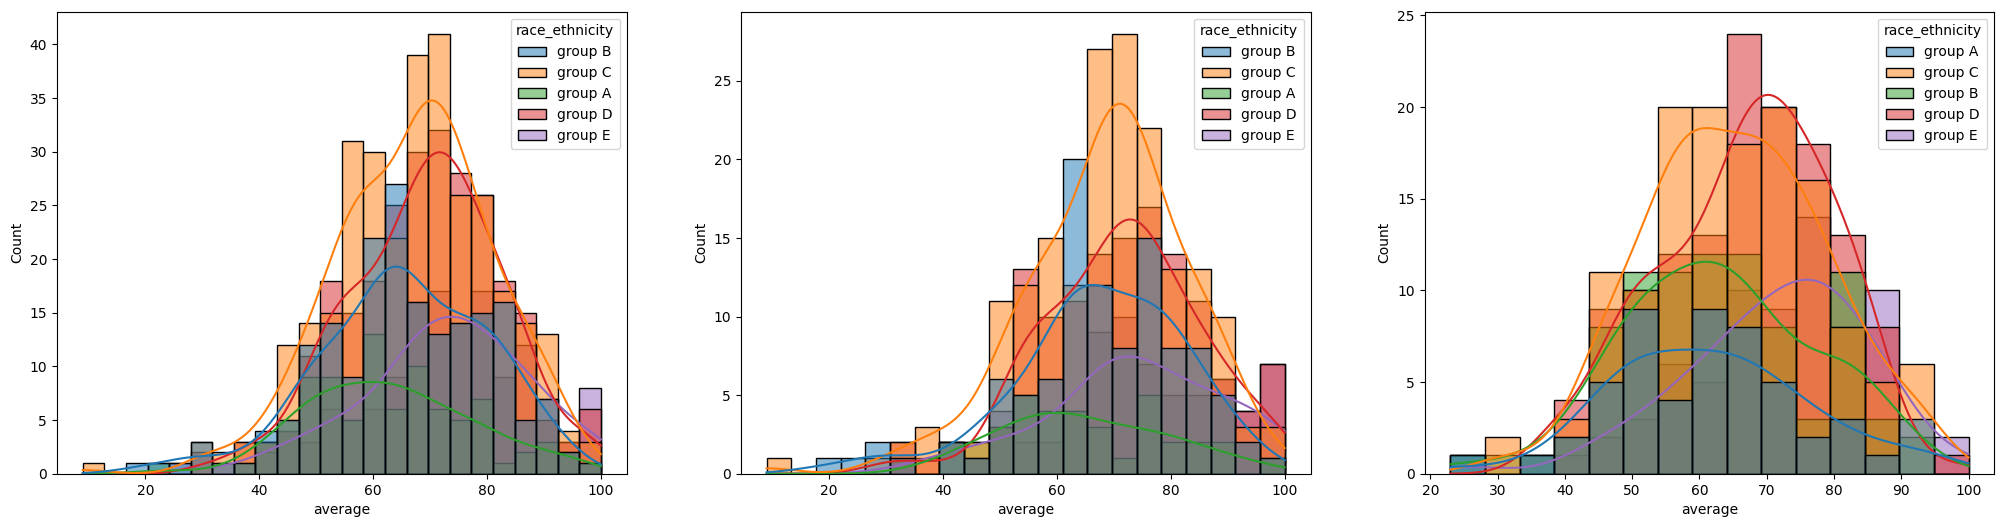

In [53]:
plt.figure(figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

### Maximum of students in all the three subjects

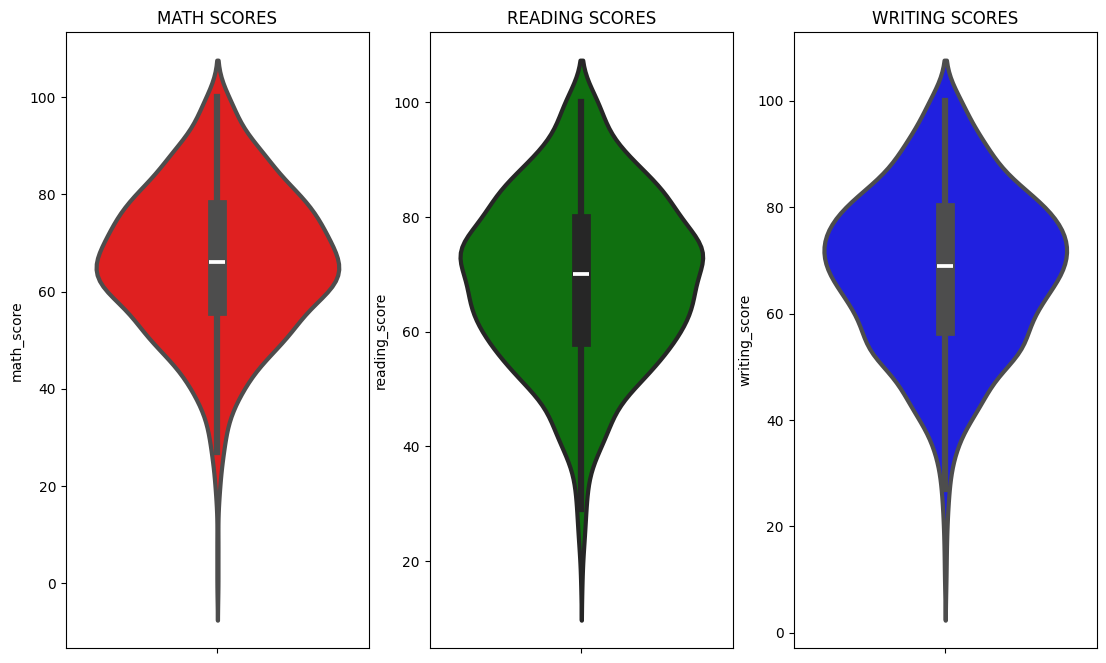

In [56]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80


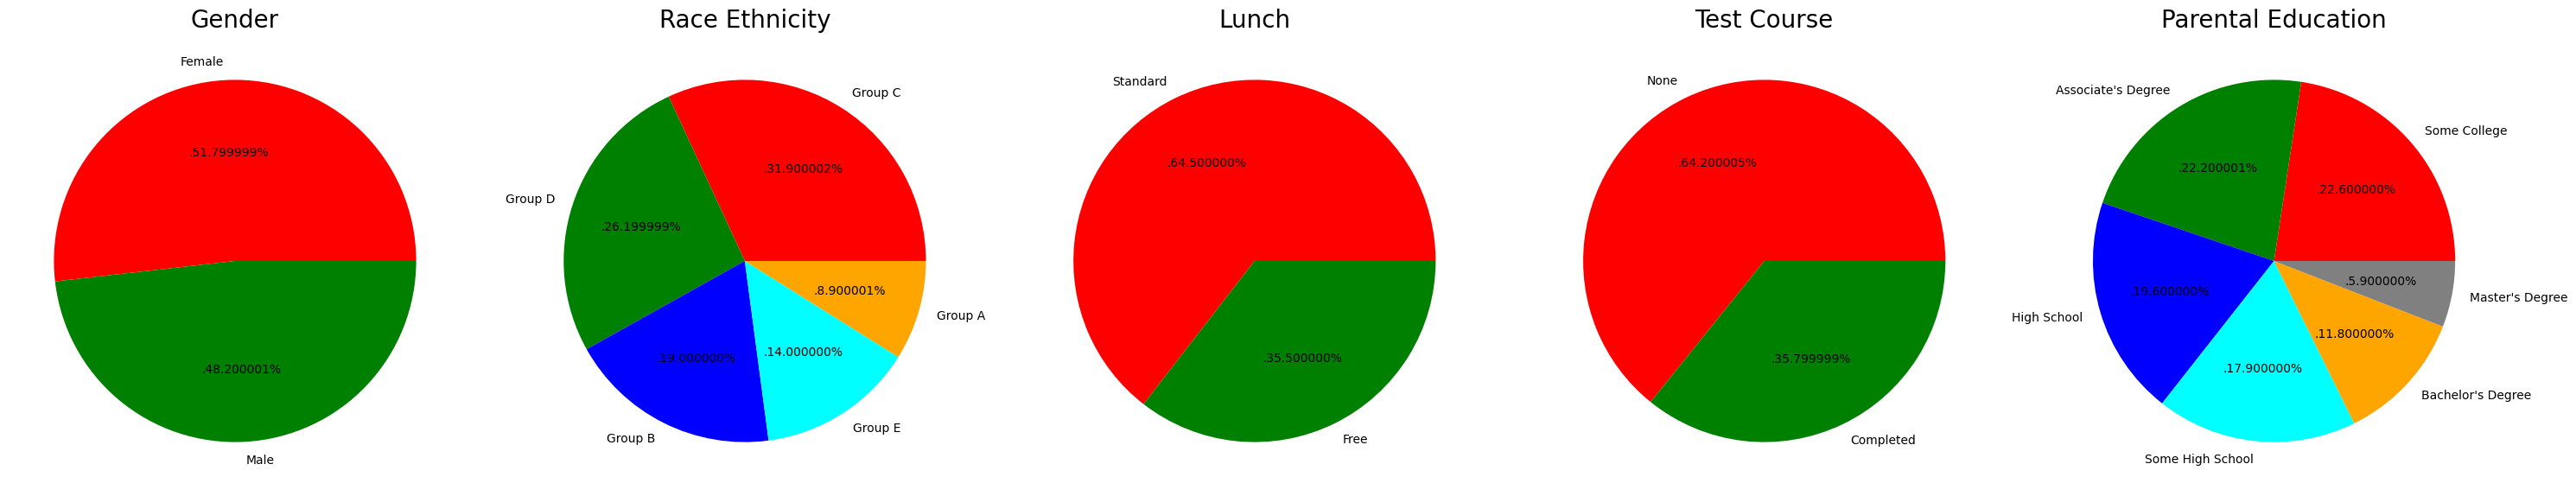

In [61]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']
plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race Ethnicity', fontsize = 20)



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)



plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)



plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)


plt.tight_layout()
plt.grid()

plt.show()

Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"
